# Data Preprocessing - Telco Customer Churn Dataset

Tahapan Data Preprocessing:
1. **Data Cleaning** - Handling missing value, duplicate value, outlier
2. **Normalisasi/standarisasi** kolom numerik  
3. **Encoding** kolom kategorikal
4. **Feature engineering** (minimal 1 feature baru)
5. **Splitting data** ke dalam data training & data testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

> Import libraries yang diperlukan

In [ ]:
df = pd.read_csv("data/telco-churn.csv")
print("dataset shape:", df.shape)
print("\n===== info Dataset =====")
print(df.info())

Dataset shape: (7043, 21)

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   obj

> Load dataset dan tampilkan informasi umum dataset

In [ ]:
print("===== sample (5 baris pertama) =====")
print(df.head())

print("\n===== unique values =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:
        print(f"  -> {df[col].unique()}")
    print()

===== Sample Data (5 baris pertama) =====
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Stream

> display sample data dan jumlah nilai unik untuk setiap kolom

In [ ]:
print("===== missing values =====")
missing_values = df.isnull().sum()
print("jumlah missing value di masing-masing kolom:")
print(missing_values)

print("\n===== convert totalCharges =====")
print("totalCharges dtype sebelum:", df['totalCharges'].dtype)

df['totalCharges'] = pd.to_numeric(df['totalCharges'], errors='coerce')
missing_total = df['totalCharges'].isnull().sum()
print(f"missing values di totalCharges: {missing_total}")

if missing_total > 0:
    df['totalCharges'].fillna(df['monthlyCharges'] * df['tenure'], inplace=True)
    print("missing values berhasil diisi dengan imputasi!")

print("totalCharges dtype sesudah:", df['totalCharges'].dtype)
print("missing values setelah handling:")
print(df.isnull().sum())

===== Missing Values =====
Jumlah missing value di masing-masing kolom:
customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet s

> handle missing values dengan mengubah totalCharges ke numeric dan isi nilai kosong

In [ ]:
print("===== duplicate values =====")
# Melihat jumlah duplicate value
duplicate_count = df.duplicated().sum()
print(f"jumlah nilai duplikat pada data: {duplicate_count}")

if duplicate_count > 0:
    print("menghapus duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"jumlah nilai duplikat pada data sekarang: {df.duplicated().sum()}")
    print(f"rows setelah menghapus duplicate: {len(df)}")
else:
    print("tidak ada duplicate rows!")

print(f"final dataset shape: {df.shape}")

===== Duplicate Values =====
Jumlah nilai duplikat pada data: 0
Tidak ada duplicate rows!
Final dataset shape: (7043, 37)


> handle duplicate values dengan menghapus baris yang duplikat

===== Outlier Detection =====


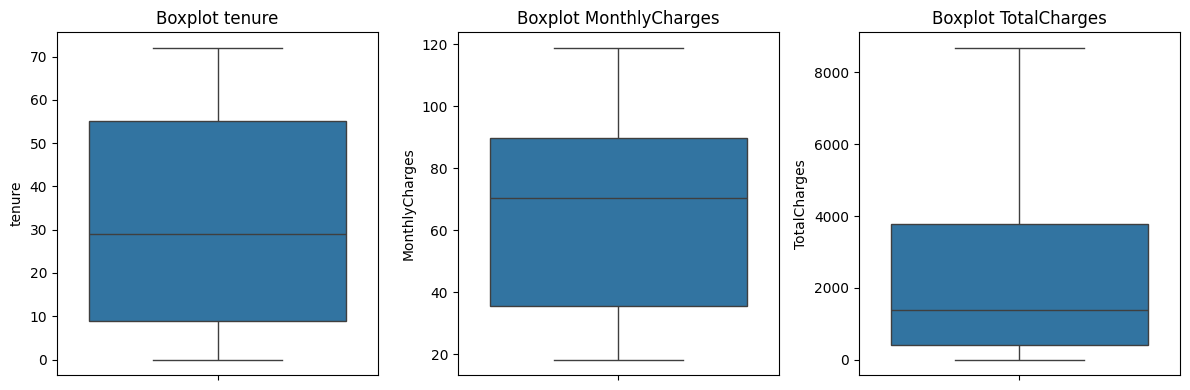

tenure: 0 outliers (0.00%)
MonthlyCharges: 0 outliers (0.00%)
TotalCharges: 0 outliers (0.00%)

Decision: Mempertahankan outliers karena mungkin valid customer behavior


In [ ]:
print("===== detect outlier =====")
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

print("\ndecision: pertahankan outliers karena kemungkinan valid perilaku customer")

> deteksi outlier menggunakan metode IQR dengan visualisasi boxplot

In [ ]:
print("===== standarisasi kolom numerik =====")
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("statistik sebelum standarisasi:")
print(df[numeric_features].describe())

scaler = StandardScaler()

df_original = df.copy()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nstatistik setelah standarisasi:")
print(df[numeric_features].describe())

print("\standarisasi selesai: Mean=0, Std=1")

===== Standarisasi Kolom Numerik =====
Statistik sebelum standarisasi:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

Statistik setelah standarisasi:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -3.783239e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -1.005780e+00
25%   -9.516817e-01   -9.725399e-01 -8.299464e-01
50%   -1.372744e-01    1.857327e-01 -3.905282e-01
75%    9.214551e-01    8.338335e-01  6.648034e-01
max    1.613701e+00    1.794352e+00  2.825806e+00

✅ St

# Normalisasi/Standarisasi Kolom Numerik
> StandardScaler untuk membuat mean=0 dan standar deviasi=1

In [ ]:
print("===== encoding kolom kategorikal =====")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
print(f"kolom kategorikal: {categorical_cols}")

binary_cols = []
multi_class_cols = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        binary_cols.append(col)
    else:
        multi_class_cols.append(col)

print(f"\nbinary columns: {binary_cols}")
print(f"multi-class columns: {multi_class_cols}")

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {le.classes_} -> {le.transform(le.classes_)}")

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

print(f"\nShape setelah encoding: {df.shape}")

===== Encoding Kolom Kategorikal =====
Kolom kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Binary columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Multi-class columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
gender: ['Female' 'Male'] -> [0 1]
Partner: ['No' 'Yes'] -> [0 1]
Dependents: ['No' 'Yes'] -> [0 1]
PhoneService: ['No' 'Yes'] -> [0 1]
PaperlessBilling: ['No' 'Yes'] -> [0 1]
Churn: ['No' 'Yes'] -> [0 1]

Shape setelah encoding: (7043, 32)

✅ Encoding selesai!


# Encoding Kolom Kategorikal
> menggunakan Label Encoding untuk binary dan One-Hot Encoding untuk multi-class

In [ ]:
print("===== feature engineering =====")

df['customer_lifetime_value'] = df_original['MonthlyCharges'] * df_original['tenure']

def categorize_tenure(tenure):
    if tenure <= 12:
        return 'new_customer'
    elif tenure <= 24:
        return 'medium_customer'
    else:
        return 'long_term_customer'

df['tenure_category'] = df_original['tenure'].apply(categorize_tenure)

service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

def count_services(row):
    count = 0
    for col in service_cols:
        if col in df_original.columns and row[col] == 'Yes':
            count += 1
    return count

df['total_services'] = df_original.apply(count_services, axis=1)

df['charges_per_service'] = df_original['MonthlyCharges'] / (df['total_services'] + 1)

df = pd.get_dummies(df, columns=['tenure_category'], drop_first=True)

new_features = ['customer_lifetime_value', 'total_services', 'charges_per_service']
scaler_new = StandardScaler()
df[new_features] = scaler_new.fit_transform(df[new_features])

print("Features baru yang dibuat:")
print("1. customer_lifetime_value")
print("2. tenure_category (+ dummy variables)")
print("3. total_services") 
print("4. charges_per_service")

print(f"\nShape setelah feature engineering: {df.shape}")

===== Feature Engineering =====
Features baru yang dibuat:
1. customer_lifetime_value
2. tenure_category (+ dummy variables)
3. total_services
4. charges_per_service

Shape setelah feature engineering: (7043, 37)

✅ Feature Engineering selesai!


# Feature Engineering
> features baru: customer lifetime value, tenure categories, service count, charges per service

In [ ]:
print("===== splitting data =====")

X = df.drop(['customerID', 'Churn'], axis=1)  
y = df['Churn']  

print(f"features shape: {X.shape}")
print(f"target shape: {y.shape}")

print(f"\ntarget distribution:")
print(y.value_counts())
print(f"\ntarget percentage:")
print(y.value_counts(normalize=True) * 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n===== hasil splitting =====")
print(f"Dimensi X train: {X_train.shape}")
print(f"Dimensi X test: {X_test.shape}")
print(f"Dimensi y train: {y_train.shape}")
print(f"Dimensi y test: {y_test.shape}")

print(f"\ntrain target distribution:")
print(y_train.value_counts())
print(f"\ntest target distribution:")
print(y_test.value_counts())

===== Data Splitting =====
Features shape: (7043, 35)
Target shape: (7043,)

Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Target percentage:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

===== Hasil Splitting =====
Training set: 5634 samples
Testing set: 1409 samples
Number of features: 35

Train target distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

Test target distribution:
Churn
0    1035
1     374
Name: count, dtype: int64

✅ Data splitting selesai!


# Splitting Data
> membagi data menjadi training set dan testing set dengan stratified sampling

In [ ]:
print("===== data preprocessing summary =====")
print(f"Dataset shape:")
print(f"   • original: {df_original.shape}")
print(f"   • final: {df.shape}")
print(f"   • features: {X_train.shape[1]}")

print(f"\nData Cleaning:")
print(f"   • missing values: Handled")
print(f"   • duplicate rows: Checked & removed")
print(f"   • outliers: Detected & preserved")

print(f"\nStandarisasi:")
print(f"   • method: StandardScaler")
print(f"   • numerical features: {len(numeric_features)} + {len(new_features)} new")

print(f"\nEncoding:")
print(f"   • binary columns: {len(binary_cols)} (Label Encoded)")
print(f"   • multi-class columns: {len(multi_class_cols)} (One-Hot Encoded)")

print(f"\nFeature Engineering:")
print(f"   • new features: 4 created")

print(f"\nTrain/Test Split:")
print(f"   • training: {X_train.shape[0]} samples")
print(f"   • testing: {X_test.shape[0]} samples")

===== SUMMARY DATA PREPROCESSING =====
📊 Dataset shape:
   • Original: (7043, 21)
   • Final: (7043, 37)
   • Features: 35

🧹 Data Cleaning:
   • Missing values: Handled
   • Duplicate rows: Checked & removed
   • Outliers: Detected & preserved

📏 Standarisasi:
   • Method: StandardScaler
   • Numerical features: 3 + 3 new

🏷️ Encoding:
   • Binary columns: 6 (Label Encoded)
   • Multi-class columns: 10 (One-Hot Encoded)

⚙️ Feature Engineering:
   • New features: 4 created

📊 Train/Test Split:
   • Training: 5634 samples (80%)
   • Testing: 1409 samples (20%)

✅ PREPROCESSING COMPLETED!
   Data siap untuk machine learning modeling


# Kesimpulan

> **Data Preprocessing telah selesai, berikut rekap dari tahapan-tahapan diatas:**
> 
> **1. Data Cleaning** 
> - Missing values: 11 nilai kosong di TotalCharges, diisi dengan imputasi
> - Duplicate values: Tidak ada data duplikat ditemukan di dataset ini
> - Outliers: Terdeteksi menggunakan metode IQR tapi dipertahankan karena kemungkinan perilaku customer yang valid
>
> **2. Data Transformation** 
> - Scaling: Standarisasi menggunakan StandardScaler (mean=0, std=1)
> - Encoding: Label Encoding untuk binary + One-Hot Encoding untuk multi-class
>
> **3. Feature Engineering** 
> - 4 features baru: customer_lifetime_value, tenure_category, total_services, charges_per_service
>
> **4. Data Splitting** 
> - Training: 80% (5,634 samples), Testing: 20% (1,409 samples)
> - Menggunakan stratified sampling untuk menjaga proporsi target

In [ ]:
print("===== DAFTAR FEATURES FINAL =====")
print(f"total features untuk modeling: {X_train.shape[1]}")
print("\nDaftar semua features:")
for i, feature in enumerate(X_train.columns, 1):
    print(f"{i:2d}. {feature}")

print(f"\n===== VARIABLES TERSIMPAN =====")
print("• X_train, X_test: Features untuk training & testing")
print("• y_train, y_test: Target variable (Churn)")
print("• df: Dataset lengkap yang sudah dipreprocess")
print("• df_original: Dataset asli sebelum standardisasi")

===== DAFTAR FEATURES FINAL =====
Total features untuk modeling: 35

Daftar semua features:
 1. gender
 2. SeniorCitizen
 3. Partner
 4. Dependents
 5. tenure
 6. PhoneService
 7. PaperlessBilling
 8. MonthlyCharges
 9. TotalCharges
10. MultipleLines_No phone service
11. MultipleLines_Yes
12. InternetService_Fiber optic
13. InternetService_No
14. OnlineSecurity_No internet service
15. OnlineSecurity_Yes
16. OnlineBackup_No internet service
17. OnlineBackup_Yes
18. DeviceProtection_No internet service
19. DeviceProtection_Yes
20. TechSupport_No internet service
21. TechSupport_Yes
22. StreamingTV_No internet service
23. StreamingTV_Yes
24. StreamingMovies_No internet service
25. StreamingMovies_Yes
26. Contract_One year
27. Contract_Two year
28. PaymentMethod_Credit card (automatic)
29. PaymentMethod_Electronic check
30. PaymentMethod_Mailed check
31. customer_lifetime_value
32. total_services
33. charges_per_service
34. tenure_category_medium_customer
35. tenure_category_new_customer



In [ ]:
print("===== CONTOH DATA SETELAH PREPROCESSING =====")
print("5 baris pertama dari training set:")
print(X_train.head())

print(f"\n===== TARGET VARIABLE DISTRIBUTION =====")
print("training set:")
train_dist = y_train.value_counts()
print(f"No Churn: {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"Churn: {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")

print("\ntesting set:")
test_dist = y_test.value_counts()
print(f"No Churn: {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"Churn: {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

===== CONTOH DATA SETELAH PREPROCESSING =====
5 baris pertama dari training set:
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3738       1              0        0           0  0.107048             0   
3151       1              0        1           1 -0.707359             1   
4860       1              0        1           1 -0.788800             0   
3867       0              0        1           0 -0.259435             1   
3810       1              0        1           1 -1.277445             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
3738                 0       -0.517207     -0.255041   
3151                 0        0.343603     -0.497736   
4860                 0       -0.804698     -0.745327   
3867                 1        0.290426     -0.165018   
3810                 0       -0.671755     -0.986125   

      MultipleLines_No phone service  ...  Contract_One year  \
3738                            True  ...              False 